# CENSUS REPORT ANALYSIS

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
#read in the csv file
df = pd.read_csv ("census_17.csv")
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,Public relations account executive,None,Methodist
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,Sports coach,None,None
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN
3,2,May Road,Frances,Singh,43,Head,Single,Female,Agricultural consultant,None,Christian
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN


In [3]:
#view the columns of the data frame
print (df.columns)

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')


In [4]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937 entries, 0 to 9936
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9935 non-null   object
 1   Street                         9937 non-null   object
 2   First Name                     9935 non-null   object
 3   Surname                        9937 non-null   object
 4   Age                            9937 non-null   object
 5   Relationship to Head of House  9937 non-null   object
 6   Marital Status                 7694 non-null   object
 7   Gender                         9937 non-null   object
 8   Occupation                     9937 non-null   object
 9   Infirmity                      9937 non-null   object
 10  Religion                       7639 non-null   object
dtypes: object(11)
memory usage: 854.1+ KB


In [5]:
df.describe()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,9935,9937,9935,9937,9937,9937,7694,9937,9937,9937,7639
unique,246,104,372,686,117,21,8,11,1129,8,14
top,1,Tannery Street,Joan,Smith,19,Head,Single,Female,Student,None,None
freq,339,1190,46,303,201,3732,3633,5241,1835,9838,3354


In [6]:
#checking for Null
df.isnull().any()

House Number                      True
Street                           False
First Name                        True
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                        False
Religion                          True
dtype: bool

House Number, First Name, Marital Status and Religion all have Null values

# DATA CLEANING

In [7]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset to check flawed columns at glance
census_report = sv.analyze(df)
#display the report
census_report.show_html('census_17.html')

                                             |                                             | [  0%]   00:00 ->…

Report census_17.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### CLEANING RELIGION

In [8]:
#checking the unique parameters of religion
df['Religion'].unique()

array(['Methodist', 'None', nan, 'Christian', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', ' ', 'Private', 'Sith', 'Jedi', 'Housekeeper',
       'Quaker', 'Pagan'], dtype=object)

In [9]:
print( df['Religion'].value_counts() )

None           3354
Christian      2293
Catholic       1096
Methodist       668
Muslim          116
Sikh             60
Jewish           43
                  3
Private           1
Sith              1
Jedi              1
Housekeeper       1
Quaker            1
Pagan             1
Name: Religion, dtype: int64


In [10]:
empty_religion =df[df['Religion'].isnull()]
empty_religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN
12,6,May Road,Phillip,Dobson,11,Grandson,NaN,Male,Student,None,NaN
13,6,May Road,Jodie,Owen,9,Granddaughter,NaN,Female,Student,None,NaN
14,6,May Road,Joyce,Owen,5,Granddaughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9915,1,Glory Folly,Justin,Whittaker,0,Son,NaN,Male,Child,None,NaN
9917,1,Wood Folly,Maurice,Iqbal-Leonard,4,Son,NaN,Male,Child,None,NaN
9918,1,Wood Folly,Naomi,Iqbal-Leonard,0,Daughter,NaN,Female,Child,None,NaN
9935,1,Williams Rectory,Bruce,Hussain,13,Son,NaN,Male,Student,None,NaN


##### 2298 rows with NaN. Let's investigate how many are children

In [111]:
child_religion = len(df[(df['Religion'].isnull()) & (df.Age < 16)])
child_religion

2009

In [ ]:
#Housekeeper changed to none as job has no direct impact on religion hence making prediction unlikely.
#Private changed to none as private has no direct impact on religion hence making prediction unlikely.
#All blanks changed to None.
#Sith and Jedi changed to None.

In [112]:
df['Religion'].replace('Housekeeper','None', inplace=True)
df['Religion'].replace('Private', 'None', inplace=True)
df['Religion'].fillna ("None", inplace = True)
df['Religion'].replace(' ','None', inplace=True)
df['Religion'].replace('Sith','None', inplace=True)
df['Religion'].replace('Jedi','None', inplace=True)


In [113]:
df['Religion'].unique()

array(['Methodist', 'None', 'Christian', 'Catholic', 'Jewish', 'Muslim',
       'Sikh', 'Quaker', 'Pagan'], dtype=object)

In [114]:
print(df['Religion'].value_counts())

None         5659
Christian    2293
Catholic     1096
Methodist     668
Muslim        116
Sikh           60
Jewish         43
Quaker          1
Pagan           1
Name: Religion, dtype: int64


##### CLEANING AGE

In [12]:
df['Age'].describe()

count     9937
unique     117
top         19
freq       201
Name: Age, dtype: object

In [13]:
#Check array of age to enable us dtype to float or int
df['Age'].unique()

array(['44', '43', '7', '17', '33', '31', '54', '57', '24', '67', '11',
       '9', '5', '37', '32', '-1', '46', '42', '79', '52', '14', '34',
       '38', '6', '48', '56', '13', '12', '65', '64', '22', '18', '70',
       '41', '16', '75', '25', '36', '10', '55', '47', '8', '4', '51',
       '45', '15', '62', '60', '53', '35', '3', '1', '0.5', '63', '30',
       '49', '28', '0', '59', '23', '26', '68', '58', '2', '29', '50',
       '72', '71', '21', '20', '80', '83', '27', '82', '40', '88', '84',
       '77', '69', '66', '39', '76', '74', '19', '61', '85', '73', '92',
       '94', '86', '81', '97', '78', '89', '96', '93', '95', '87',
       'Sixteen', 'fourty two', '90', '103', '61.15637796', '99',
       'twenty one', '104', '112', '98', '100', '240', '66.5', '91',
       '102', '101', '49.46798826', '52.46798826', '24.5'], dtype=object)

In [14]:
#clean age in words to figure
import word2number
from word2number import w2n

In [15]:
df.Age = df.Age.astype(str)

In [16]:
df.Age = df.Age.replace('twenty one', 21).replace('Sixteen', 16).replace("fourty two", 42)
df.Age.unique()


array(['44', '43', '7', '17', '33', '31', '54', '57', '24', '67', '11',
       '9', '5', '37', '32', '-1', '46', '42', '79', '52', '14', '34',
       '38', '6', '48', '56', '13', '12', '65', '64', '22', '18', '70',
       '41', '16', '75', '25', '36', '10', '55', '47', '8', '4', '51',
       '45', '15', '62', '60', '53', '35', '3', '1', '0.5', '63', '30',
       '49', '28', '0', '59', '23', '26', '68', '58', '2', '29', '50',
       '72', '71', '21', '20', '80', '83', '27', '82', '40', '88', '84',
       '77', '69', '66', '39', '76', '74', '19', '61', '85', '73', '92',
       '94', '86', '81', '97', '78', '89', '96', '93', '95', '87', 16, 42,
       '90', '103', '61.15637796', '99', 21, '104', '112', '98', '100',
       '240', '66.5', '91', '102', '101', '49.46798826', '52.46798826',
       '24.5'], dtype=object)

In [17]:
df.Age = df.Age.astype(float)
df.Age = df.Age.astype(int)

In [18]:
df.Age.unique()

array([ 44,  43,   7,  17,  33,  31,  54,  57,  24,  67,  11,   9,   5,
        37,  32,  -1,  46,  42,  79,  52,  14,  34,  38,   6,  48,  56,
        13,  12,  65,  64,  22,  18,  70,  41,  16,  75,  25,  36,  10,
        55,  47,   8,   4,  51,  45,  15,  62,  60,  53,  35,   3,   1,
         0,  63,  30,  49,  28,  59,  23,  26,  68,  58,   2,  29,  50,
        72,  71,  21,  20,  80,  83,  27,  82,  40,  88,  84,  77,  69,
        66,  39,  76,  74,  19,  61,  85,  73,  92,  94,  86,  81,  97,
        78,  89,  96,  93,  95,  87,  90, 103,  99, 104, 112,  98, 100,
       240,  91, 102, 101])

In [19]:
df['Age'].describe()

count    9937.000000
mean       36.616283
std        21.818729
min        -1.000000
25%        19.000000
50%        36.000000
75%        52.000000
max       240.000000
Name: Age, dtype: float64

 ###### min age of -1 and max age of 240 are obvious outliers. Lets investigate.

In [20]:
#checking for fake ages
df[ df.Age >= 120 ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3812,14,First Overpass,Donna,Fisher,240,Lodger,Single,Female,"Designer, furniture",None,None


In [21]:
#checking through occupants in same house to determine if it was an error
df.iloc[3807:3813]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3807,13,First Overpass,Rita,Ashton,45,Cousin,Single,Female,Unemployed,None,Christian
3808,14,First Overpass,Dawn,Green,27,Head,Married,Fe-male,Clinical embryologist,None,None
3809,14,First Overpass,Dylan,Green,28,Husband,Married,Male,Plant breeder/geneticist,None,None
3810,14,First Overpass,Carolyn,Jones,30,Sibling,Single,Female,"Radiographer, diagnostic",None,Christian
3811,14,First Overpass,Rita,Richardson,46,Lodger,Single,Female,Unemployed,None,None
3812,14,First Overpass,Donna,Fisher,240,Lodger,Single,Female,"Designer, furniture",None,None


In [22]:
# I presume 3812 should be 24 as she is a lodger and still employed hence an input error, replace 240 with 24.

df.Age = df.Age.replace (240,24)
df.Age.unique()

array([ 44,  43,   7,  17,  33,  31,  54,  57,  24,  67,  11,   9,   5,
        37,  32,  -1,  46,  42,  79,  52,  14,  34,  38,   6,  48,  56,
        13,  12,  65,  64,  22,  18,  70,  41,  16,  75,  25,  36,  10,
        55,  47,   8,   4,  51,  45,  15,  62,  60,  53,  35,   3,   1,
         0,  63,  30,  49,  28,  59,  23,  26,  68,  58,   2,  29,  50,
        72,  71,  21,  20,  80,  83,  27,  82,  40,  88,  84,  77,  69,
        66,  39,  76,  74,  19,  61,  85,  73,  92,  94,  86,  81,  97,
        78,  89,  96,  93,  95,  87,  90, 103,  99, 104, 112,  98, 100,
        91, 102, 101])

In [23]:
df[ df.Age <= -1 ] #checking for input error

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
17,7,May Road,Jade,Quinn,-1,Daughter,NaN,Female,Child,None,NaN


In [24]:
df.iloc [15 : 20]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,7,May Road,Joshua,Quinn,37,Head,Married,Male,"Engineer, manufacturing systems",None,Christian
16,7,May Road,Grace,Quinn,32,Wife,Married,Female,Electrical engineer,None,None
17,7,May Road,Jade,Quinn,-1,Daughter,NaN,Female,Child,None,NaN
18,7,May Road,Amy,Adams,46,Sibling,Widowed,Female,Recruitment consultant,None,None
19,7,May Road,Joanna,Smith,42,Lodger,Widowed,Female,Newspaper journalist,None,Methodist


In [25]:
# Child should be 1, input error
df.Age = df.Age.replace (-1,1)
df.Age.unique()

array([ 44,  43,   7,  17,  33,  31,  54,  57,  24,  67,  11,   9,   5,
        37,  32,   1,  46,  42,  79,  52,  14,  34,  38,   6,  48,  56,
        13,  12,  65,  64,  22,  18,  70,  41,  16,  75,  25,  36,  10,
        55,  47,   8,   4,  51,  45,  15,  62,  60,  53,  35,   3,   0,
        63,  30,  49,  28,  59,  23,  26,  68,  58,   2,  29,  50,  72,
        71,  21,  20,  80,  83,  27,  82,  40,  88,  84,  77,  69,  66,
        39,  76,  74,  19,  61,  85,  73,  92,  94,  86,  81,  97,  78,
        89,  96,  93,  95,  87,  90, 103,  99, 104, 112,  98, 100,  91,
       102, 101])

##### CLEANING MARITAL STATUS

In [26]:
df ['Marital Status'].unique()      #Checking unique variables in marital status

array(['Single', nan, 'Married', 'Divorced', 'Widowed', 'widowed',
       'MARRIED', 'Di-vorced', 'single'], dtype=object)

In [27]:
print (df['Marital Status'].value_counts())

Single       3633
Married      2651
Divorced      966
Widowed       440
widowed         1
MARRIED         1
Di-vorced       1
single          1
Name: Marital Status, dtype: int64


In [28]:
#merging variables for uniformity
df['Marital Status'] = df['Marital Status'].replace('Di-vorced','Divorced')
df['Marital Status'] = df['Marital Status'].replace('widowed','Widowed')
df['Marital Status'] = df['Marital Status'].replace('MARRIED','Married')
df['Marital Status'] = df['Marital Status'].replace('single','Single')

In [29]:
df['Marital Status'].unique()

array(['Single', nan, 'Married', 'Divorced', 'Widowed'], dtype=object)

In [30]:
#checking for NaN
empty_marriage =df[df['Marital Status'].isnull()]

In [31]:
empty_marriage

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN
12,6,May Road,Phillip,Dobson,11,Grandson,NaN,Male,Student,None,NaN
13,6,May Road,Jodie,Owen,9,Granddaughter,NaN,Female,Student,None,NaN
14,6,May Road,Joyce,Owen,5,Granddaughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9915,1,Glory Folly,Justin,Whittaker,0,Son,NaN,Male,Child,None,NaN
9917,1,Wood Folly,Maurice,Iqbal-Leonard,4,Son,NaN,Male,Child,None,NaN
9918,1,Wood Folly,Naomi,Iqbal-Leonard,0,Daughter,NaN,Female,Child,None,NaN
9935,1,Williams Rectory,Bruce,Hussain,13,Son,NaN,Male,Student,None,NaN


In [32]:
#checking for the prevalent age range with NaN
child_unmarried = len(df[(df['Marital Status'].isnull()) & (df.Age < 16)])
child_unmarried

2009

In [33]:
#checking for the any married under age children
underage_marriage = len(df[(df['Marital Status']=='Married') & (df.Age <= 16)])
underage_marriage

0

In [34]:
#checking for single that require consent under NaN.
unmarried =len(df[(df['Marital Status'].isnull()) & (df.Age >= 16) & (df.Age <= 20)])
unmarried

234

In [35]:
#checking for underaged widow
len(df[(df['Marital Status']=='Widowed') & (df.Age <= 18)])

5

In [36]:
df[(df['Marital Status']=='Widowed') & (df.Age <= 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
511,21,Corporation Lane,Jill,Davies,18,Daughter,Widowed,Female,Student,None,None
4388,39,Sheffield Parkways,Gordon,Hill,18,Son,Widowed,Male,Student,None,None
6060,128,Hale Street,Duncan,Wong,18,Son,Widowed,Male,Student,None,None
7819,40,Marshall Road,Stephanie,Shaw,18,Lodger,Widowed,Female,Student,None,NaN
9907,1,Glory Folly,Elliot,Whittaker,18,Son,Widowed,Male,Student,None,None


In [37]:
#checking the list of all occupants in same house
df.iloc [511 : 515]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
511,21,Corporation Lane,Jill,Davies,18,Daughter,Widowed,Female,Student,None,None
512,21,Corporation Lane,Henry,Davies,16,Son,NaN,Male,Student,None,NaN
513,21,Corporation Lane,Elaine,Davies,13,Daughter,NaN,Female,Student,None,NaN
514,22,Corporation Lane,Peter,Ellis,50,Head,Single,Male,Wellsite geologist,None,


In [38]:
df.iloc [4386 : 4391]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4386,39,Sheffield Parkways,Natasha,Hill,34,Head,Married,Female,Tax inspector,None,Jewish
4387,39,Sheffield Parkways,Allan,Hill,41,Husband,Married,Male,Forensic psychologist,None,Jewish
4388,39,Sheffield Parkways,Gordon,Hill,18,Son,Widowed,Male,Student,None,None
4389,39,Sheffield Parkways,Terence,Hill,17,Son,NaN,Male,Student,None,NaN
4390,39,Sheffield Parkways,Ann,Hill,15,Daughter,NaN,Female,Student,None,NaN


In [39]:
df.iloc [6059 : 6064]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6059,128,Hale Street,Karen,Wong,50,Head,Single,Female,"Surveyor, commercial/residential",None,Christian
6060,128,Hale Street,Duncan,Wong,18,Son,Widowed,Male,Student,None,None
6061,128,Hale Street,Dawn,Archer-Wong,16,Daughter,NaN,Female,Student,None,NaN
6062,128,Hale Street,Lisa,Archer-Wong,10,Daughter,NaN,Female,Student,None,NaN
6063,128,Hale Street,Mohammed,Archer-Wong,7,Son,NaN,Male,Student,None,NaN


In [40]:
df.iloc [7816 : 7820]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7816,40,Marshall Road,Jacqueline,Moran,42,Head,Widowed,Female,Dancer,None,Christian
7817,40,Marshall Road,Elliott,Moran,1,Son,NaN,Male,Child,None,NaN
7818,40,Marshall Road,Mary,Francis,23,Lodger,Single,Female,"Conservation officer, historic buildings",None,Christian
7819,40,Marshall Road,Stephanie,Shaw,18,Lodger,Widowed,Female,Student,None,NaN


In [41]:
df.iloc [9907 : 9911]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9907,1,Glory Folly,Elliot,Whittaker,18,Son,Widowed,Male,Student,None,None
9908,1,Glory Folly,Beth,Whittaker,18,Daughter,Single,Female,Student,None,None
9909,1,Glory Folly,Barry,Whittaker,16,Son,NaN,Male,Student,None,NaN
9910,1,Glory Folly,Keith,Whittaker,13,Son,NaN,Male,Student,None,NaN


In [42]:
#replacing all underaged widow with single
df.iloc[511, df.columns.get_loc('Marital Status')] = 'Single'
df.iloc[4388, df.columns.get_loc('Marital Status')] = 'Single'
df.iloc[6060, df.columns.get_loc('Marital Status')] = 'Single'
df.iloc[7819, df.columns.get_loc('Marital Status')] = 'Single'
df.iloc[9907, df.columns.get_loc('Marital Status')] = 'Single'

In [43]:
#reconfirming underaged no longer exist
df[(df['Marital Status']=='Widowed') & (df.Age <= 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


##### CLEANING HOUSE NUMBER

In [44]:
df[df['House Number'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
37,NaN,May Road,Bethan,Lee,64,Wife,Married,Female,Conference centre manager,None,Christian
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None


In [45]:
#Checking within her family to determine house number
df.iloc [36 : 41]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,13,May Road,Conor,Lee,65,Head,Married,Male,"Education officer, museum",None,Christian
37,NaN,May Road,Bethan,Lee,64,Wife,Married,Female,Conference centre manager,None,Christian
38,13,May Road,Danielle,Lee,22,Granddaughter,Divorced,Female,University Student,None,None
39,13,May Road,Clifford,Parry,18,Grandson,Single,Male,Student,None,Christian
40,13,May Road,Amber,Parry,14,Granddaughter,NaN,Female,Student,None,NaN


In [46]:
#checking within street to ascertain missing house number.
df.iloc [122 : 125]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
122,37,May Road,Richard,Begum,5,Son,NaN,Male,Student,None,NaN
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None
124,39,May Road,Jack,Todd,32,Head,Single,Male,"Scientist, research (medical)",Mental Disability,None


In [47]:
#fillin the missing house numbers
df.iloc[37, df.columns.get_loc('House Number')] = 13
df.iloc[123, df.columns.get_loc('House Number')] = 38

In [48]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', 13, '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', 38, '39', '40', '41', 'Fourty Two', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '38', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '120', '121', '122', '123', '124',
       '125', '126', '127', '128', '129', '130', '131', '132', '133',
       '134', '135', '136', '137', '138', '139', '140', '141', '

In [49]:
df['House Number'] = df['House Number'].replace('Fourty Two', 42)
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', 13, '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', 38, '39', '40', '41', 42, '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '38', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98',
       '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', '128', '129', '130', '131', '132', '133', '134',
       '135', '136', '137', '138', '139', '140', '141', '142', '143

In [50]:
df['House Number'] = df['House Number'].astype(int)

##### CLEANING FIRST NAME

In [51]:
df[df['First Name'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1528,25,Oak Expressway,NaN,Marion Fisher,4,Daughter,NaN,Female,Child,None,NaN
3565,168,Tannery Street,NaN,Timothy Taylor,34,Lodger,Single,Male,"Surveyor, planning and development",None,Christian


In [52]:
#checking if name was merged with Surname
df.iloc [1526 : 1529]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1526,25,Oak Expressway,Molly,Fisher,32,Head,Single,Female,Colour technologist,None,None
1527,25,Oak Expressway,Oliver,Morrison,37,Partner,Single,Male,Psychiatric nurse,None,None
1528,25,Oak Expressway,NaN,Marion Fisher,4,Daughter,NaN,Female,Child,None,NaN


In [53]:
#split surname to first name and surname
df.iloc[1528, df.columns.get_loc('First Name')] = 'Marion'
df.iloc[1528, df.columns.get_loc('Surname')] = 'Fisher'

In [54]:
#split surname to first name and surname
df.iloc[3565, df.columns.get_loc('First Name')] = 'Timothy'
df.iloc[3565, df.columns.get_loc('Surname')] = 'Taylor'

##### CLEANING GENDER

In [55]:
#checking for unique variables in Gender
df.Gender.unique()

array(['Male', 'Female', ' ', 'Fe-male', 'male', 'Mal e', 'fema le',
       'MALE', 'FEMALE', 'female', 'Fem-ale'], dtype=object)

In [56]:
#merging variables for uniformity
df['Gender'] = df['Gender'].replace('Fe-male','Female').replace("MALE", 'Male').replace("female",'Female').replace("FEMALE", 'Female').replace('male', 'Male').replace('fema le','Female').replace('Fem-ale', 'Female').replace('Mal e','Male').replace(" ", 'Male')
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [57]:
df.Gender.value_counts()

Female    5247
Male      4690
Name: Gender, dtype: int64

##### CLEANING RELATIONSHIP TO HEAD OF HOUSE

In [58]:
df['Relationship to Head of House'].unique()

array(['Head', 'Partner', 'Daughter', 'Wife', 'Husband', 'Grandson',
       'Granddaughter', 'Sibling', 'Lodger', 'Son', 'None',
       'Adopted Daughter', 'Cousin', 'Step-Daughter', 'Visitor',
       'Step-Son', 'Adopted Son', 'Nephew', ' ', 'Neice',
       'Adopted Grandson'], dtype=object)

In [59]:
df['Relationship to Head of House'].value_counts()

Head                3732
Son                 1578
Daughter            1525
Husband              949
None                 722
Lodger               380
Wife                 371
Partner              292
Grandson              98
Granddaughter         84
Sibling               57
Cousin                42
Visitor               29
Adopted Daughter      21
Step-Daughter         18
Step-Son              12
Adopted Son           12
Nephew                 7
Neice                  4
                       3
Adopted Grandson       1
Name: Relationship to Head of House, dtype: int64

In [60]:
df['Relationship to Head of House'].replace(' ','None', inplace=True)

In [61]:
None_HOH =df[df['Relationship to Head of House']=='None']
None_HOH

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
125,39,May Road,Terry,Davies,31,None,Single,Male,Radiation protection practitioner,None,Christian
126,39,May Road,Joseph,Sykes,18,None,Single,Male,Student,None,NaN
127,39,May Road,Ellie,Taylor,18,None,Single,Female,Student,None,NaN
128,39,May Road,Tina,Gilbert,22,None,Single,Female,University Student,None,Catholic
154,47,May Road,Andrew,Perkins,29,None,Single,Male,Special educational needs teacher,None,None
...,...,...,...,...,...,...,...,...,...,...,...
9871,1,Godfrey Obervatory,Bethany,Clark,28,None,Single,Female,"Administrator, Civil Service",None,None
9922,1,Taylor Inn,Lucy,Begum,31,None,Single,Female,"Teacher, primary school",None,Methodist
9923,1,Taylor Inn,Dale,Smith,31,None,Single,Male,Veterinary surgeon,None,None
9924,1,Taylor Inn,Tony,Coles,33,None,Single,Male,Tourist information centre manager,None,None


##### CLEANING OCCUPATION

In [62]:
df[(df['Occupation']=='Unemployed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,May Road,Marie,James,54,Head,Married,Female,Unemployed,None,None
25,10,May Road,Elliot,Buckley,34,Husband,Married,Male,Unemployed,None,Catholic
29,11,May Road,Charlie,Smart,42,Husband,Married,Male,Unemployed,None,None
101,32,May Road,Jacqueline,Porter,35,Head,Divorced,Female,Unemployed,None,Methodist
106,33,May Road,Beverley,McKenzie,30,Head,Divorced,Female,Unemployed,None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
9828,2,Gracebond Lane,Kirsty,Holland,57,Lodger,Single,Female,Unemployed,None,None
9833,5,Gracebond Lane,Rita,Cooper,59,Head,Divorced,Female,Unemployed,None,None
9849,1,Ebor Warehouse,Annette,Thompson-Jones,19,Daughter,Single,Female,Unemployed,Blind,Methodist
9896,1,East Hold,Christopher,Whittaker,45,Son,Single,Male,Unemployed,None,Christian


In [64]:
Retired= df[(df['Occupation']=='Unemployed') & (df.Age >65)].replace('Unemployed','Retired')
Retired.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
164,51,May Road,Linda,Armstrong,71,Wife,Married,Female,Retired,None,None
306,5,Henry Run,Laura,Davies,85,Head,Divorced,Female,Retired,None,None
960,7,Prince Plains,Beverley,Roberts,78,Head,Widowed,Female,Retired,None,None
1010,24,Prince Plains,Leanne,Nelson,71,Wife,Married,Female,Retired,None,None
1093,1,Taurusbait Lane,Marian,Richards,69,Head,Single,Female,Retired,None,None


In [65]:
df[(df['Occupation']!='Unemployed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,Public relations account executive,None,Methodist
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,Sports coach,None,None
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN
3,2,May Road,Frances,Singh,43,Head,Single,Female,Agricultural consultant,None,Christian
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9932,1,Williams Rectory,David,Smith,57,Partner,Single,Male,Archaeologist,None,Christian
9933,1,Williams Rectory,Dorothy,Hussain,20,Daughter,Single,Female,University Student,None,None
9934,1,Williams Rectory,Scott,Hussain,19,Son,Single,Male,University Student,None,None
9935,1,Williams Rectory,Bruce,Hussain,13,Son,NaN,Male,Student,None,NaN


In [66]:
#extracting employed out of the population
Employed = df[(df['Occupation']!='Unemployed') & (df['Occupation']!='Student') & (df['Age']<=64) & (df['Occupation']!='University Student') &
  (df['Occupation']!='Child') &(df['Occupation']!='Phd Student')]

In [67]:
Employed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,Public relations account executive,None,Methodist
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,Sports coach,None,None
3,2,May Road,Frances,Singh,43,Head,Single,Female,Agricultural consultant,None,Christian
5,3,May Road,Scott,Dunn,33,Head,Married,Male,Technical author,None,None
6,3,May Road,Jane,Dunn,31,Wife,Married,Female,Set designer,None,None
...,...,...,...,...,...,...,...,...,...,...,...
9928,1,Metropolis Fort,Patricia,Wilkinson,30,Daughter,Single,Female,Leisure centre manager,None,None
9929,1,Metropolis Fort,Adrian,Wilkinson,26,Son,Single,Male,Radio broadcast assistant,None,None
9930,1,Metropolis Fort,Leslie,Wilkinson,24,Son,Single,Male,Human resources officer,None,None
9931,1,Williams Rectory,Ashleigh,Hussain,50,Head,Single,Female,Clinical biochemist,None,Christian


In [68]:
#checking for wrong categorization : unemployed children 
unemployed_children= df[(df['Occupation']=='Unemployed') & (df.Age <=5)]
unemployed_children

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [69]:
(df['Occupation']=='None').sum()

0

In [70]:
(df['Occupation']=='None').isnull().sum()

0

In [71]:
(df['Occupation']==',').sum()

0

# VISUALIZATION

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport

###### Plot showing outliers in Marital Status

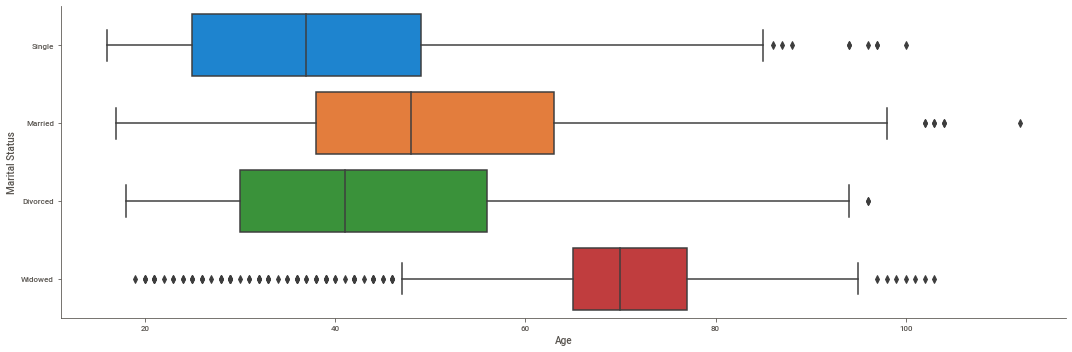

In [73]:
sns.catplot(data =df, x= 'Age', y='Marital Status', height =5, aspect=3, kind='box')

##### Plot showing  Outliers in Age conditioned by Relationship to Head of House

C:\Users\Dell\AppData\Local\Temp/ipykernel_11652/3790526205.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


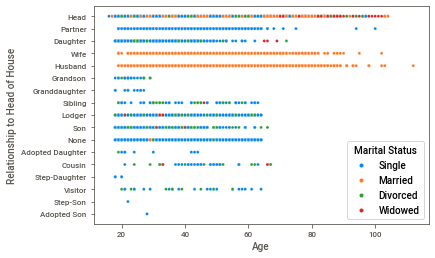

In [74]:
sns.scatterplot(data = df, y ="Relationship to Head of House", x = "Age", hue = "Marital Status")

plt.show()

##### Plot showing Male and Female Population

<AxesSubplot:xlabel='Gender'>

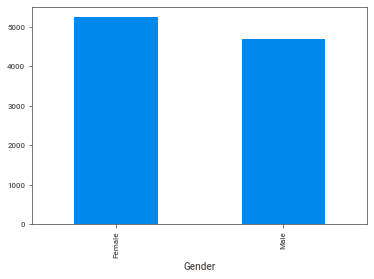

In [75]:
#male and female population.
groups = df.groupby(['Gender']).size()
groups.plot.bar()

###### Plot showing Age distribution between Male and Female

<AxesSubplot:xlabel='Age', ylabel='Count'>

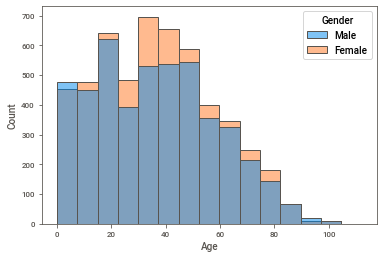

In [76]:
sns.histplot (data =df, x= 'Age',hue = 'Gender', bins= 15)

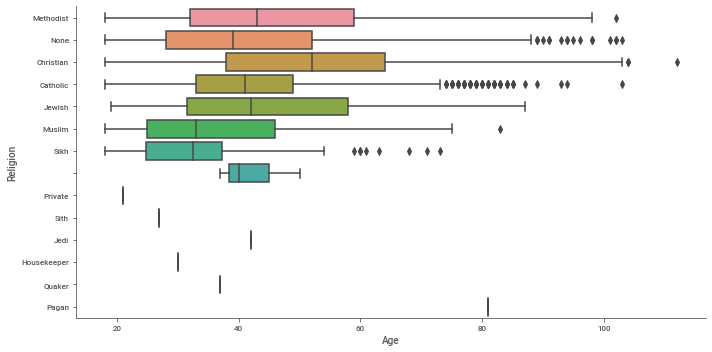

In [77]:
sns.catplot(data =df, x= 'Age', y='Religion', height =5, aspect=2, kind='box')
#plt.title('Unemployed count by Age',fontsize = 18)

Text(0.5, 1.0, 'Unemployed count by Age')

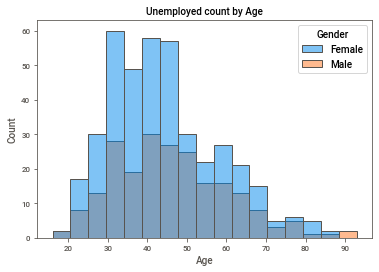

In [78]:
%matplotlib inline
sns.histplot(data =df[(df['Occupation']=='Unemployed')], x= 'Age',hue ='Gender')
plt.title('Unemployed count by Age',fontsize = 10)

### AGE PYRAMID

In [79]:
#Iterate through the age as copied from https://www.reddit.com/r/learnpython/comments/4jxd3e/how_to_correct_indexerror_in_pandas_with_iterrows/

for i,j in df.iterrows():
    if df.loc[i,"Age"] <= 4:
        df.loc[i,"Age band"] = "0-4"
    elif df.loc[i,"Age"] >= 5 and df.loc[i,"Age"] <=9:
        df.loc[i,"Age band"] = "5-9"
    elif df.loc[i,"Age"] >= 9 and df.loc[i,"Age"] <=14:
        df.loc[i,"Age band"] = "10-14"
    elif df.loc[i,"Age"] >= 15 and df.loc[i,"Age"] <=19:
        df.loc[i,"Age band"] = "15-19"
    elif df.loc[i,"Age"] >= 20 and df.loc[i,"Age"] <=24:
        df.loc[i,"Age band"] = "20-24"
    elif df.loc[i,"Age"] >= 25 and df.loc[i,"Age"] <=29:
        df.loc[i,"Age band"] = "25-29"
    elif df.loc[i,"Age"] >= 30 and df.loc[i,"Age"] <=34:
        df.loc[i,"Age band"] = "30-34"
    elif df.loc[i,"Age"] >= 35 and df.loc[i,"Age"] <=39:
        df.loc[i,"Age band"] = "35-39"
    elif df.loc[i,"Age"] >= 40 and df.loc[i,"Age"] <=44:
        df.loc[i,"Age band"] = "40-44"
    elif df.loc[i,"Age"] >= 45 and df.loc[i,"Age"] <=49:
        df.loc[i,"Age band"] = "45-49"
    elif df.loc[i,"Age"] >= 50 and df.loc[i,"Age"] <=54:
        df.loc[i,"Age band"] = "50-54"
    elif df.loc[i,"Age"] >= 55 and df.loc[i,"Age"] <=59:
        df.loc[i,"Age band"] = "55-59"
    elif df.loc[i,"Age"] >= 60 and df.loc[i,"Age"] <=64:
        df.loc[i,"Age band"] = "60-64"
    elif df.loc[i,"Age"] >= 65 and df.loc[i,"Age"] <=69:
        df.loc[i,"Age band"] = "65-69"
    elif df.loc[i,"Age"] >= 70 and df.loc[i,"Age"] <=74:
        df.loc[i,"Age band"] = "70-74"
    elif df.loc[i,"Age"] >= 75 and df.loc[i,"Age"] <=79:
        df.loc[i,"Age band"] = "75-79"
    elif df.loc[i,"Age"] >= 80 and df.loc[i,"Age"] <=84:
        df.loc[i,"Age band"] = "80-84"
    elif df.loc[i,"Age"] >= 85 and df.loc[i,"Age"] <=89:
        df.loc[i,"Age band"] = "85-89"
    elif df.loc[i,"Age"] >= 90 and df.loc[i,"Age"] <=94:
        df.loc[i,"Age band"] = "90-94"
    elif df.loc[i,"Age"] >= 95 and df.loc[i,"Age"] <=99:
        df.loc[i,"Age band"] = "95-99"
else:
    df.loc[i,"Age band"] = "100+"

Text(0.5, 1.0, 'Age Pyramid')

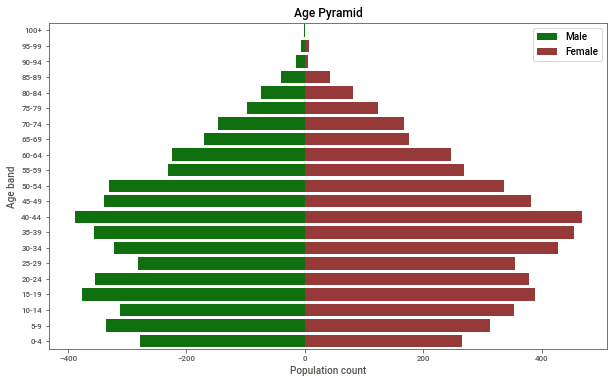

In [82]:


#https://stackoverflow.com/questions/60969101/how-to-build-a-population-pyramid-with-python
male= []
female= []

AgeClass = ['100+', '95-99', '90-94','85-89', '80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

for i in AgeClass:
    x = len(df[(df["Gender"] == "Male") & (df["Age band"] == i)])
    male.append(-x)
for i in AgeClass:
    y = len(df[(df["Gender"] == "Female") & (df["Age band"] == i)])
    female.append(y)


age_pop = pd.DataFrame({'Age': ['100+', '95-99', '90-94','85-89', '80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4'],
'Male': male,'Female':female})

AgeClass = ['100+', '95-99', '90-94','85-89', '80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

plt.figure(figsize = (10,6))

age_pyramid = sns.barplot(x='Male', y='Age', data=age_pop, color=('green'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=age_pop, color=('brown'), label='Female')
age_pyramid.set(title = 'Age Pyramid')
plt.xlabel("Population count")
plt.ylabel("Age band")
plt.legend()
plt.title('Age Pyramid')



In [83]:
df['Age'].describe()

count    9937.000000
mean       36.594747
std        21.723136
min         0.000000
25%        19.000000
50%        36.000000
75%        52.000000
max       112.000000
Name: Age, dtype: float64

In [84]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age band
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,Public relations account executive,None,Methodist,40-44
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,Sports coach,None,None,40-44
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN,5-9
3,2,May Road,Frances,Singh,43,Head,Single,Female,Agricultural consultant,None,Christian,40-44
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN,15-19


In [85]:
df['Age band'].value_counts()

40-44    857
35-39    810
15-19    765
30-34    751
20-24    733
45-49    721
50-54    666
10-14    665
5-9      649
25-29    637
0-4      544
55-59    500
60-64    471
65-69    347
70-74    315
75-79    220
80-84    155
85-89     84
90-94     21
95-99     13
100+       1
Name: Age band, dtype: int64

### DEATH RATE

In [86]:
#gathering number of individuals with likely chances of death
age_66_70 = len(df[(df.Age >= 66) & (df.Age<= 70)])
age_71_75 = len(df[(df.Age >= 71) & (df.Age<= 75)])
age_76_80 = len(df[(df.Age >= 76) & (df.Age<= 80)])
age_81_85 = len(df[(df.Age >= 81) & (df.Age<= 85)])
age_86_90 = len(df[(df.Age >= 86) & (df.Age<= 90)])
age_91_95 = len(df[(df.Age >= 91) & (df.Age<= 95)])
age_96_100 = len(df[(df.Age >= 96) & (df.Age<= 100)])
age_101_105 = len(df[(df.Age >= 101) & (df.Age<= 105)])
age_106_110 = len(df[(df.Age >= 106) & (df.Age<= 110)])
age_111_115 = len(df[(df.Age >= 111) & (df.Age<= 115)])
age_116_120 = len(df[(df.Age >= 116) & (df.Age<= 120)])
age_121_125 = len(df[(df.Age >= 121) & (df.Age<= 125)])


In [87]:
#death Rate between 2 age bands
death6675=age_66_70-age_71_75
death7685 =age_76_80-age_81_85
death8695=age_86_90-age_91_95
death96105=age_96_100-age_101_105
death106_115=age_106_110-age_111_115
death116_125=age_116_120-age_121_125

In [88]:
#crude death rate per thousand
total_death_rate=((death6675+death7685+death8695+death96105+death106_115+death116_125)/len(df))*1000
print(f"crude death rate per 1000: {total_death_rate}")

crude death rate per 1000: 13.98812518868874


### LIFE EXPECTANCY BY GENDER

In [89]:
#analysing who has older population number 

older_men_pop = len(df[(df['Gender']=='Male') & (df.Age > 65)])
older_women_pop = len(df[(df['Gender']=='Female') & (df.Age > 65)])

print(f"Number of older men: {older_men_pop}")
print(f"Number of older women: {older_women_pop}")

Number of older men: 519
Number of older women: 572


In [90]:
#percentage of older population
old_population= (older_men_pop + older_women_pop)/len(df)
old_population*100

10.979168763208213

In [91]:
df[df['Age']>100]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age band
2247,108,Ripon Lane,Sara,Hughes,103,Head,Widowed,Female,Retired English as a second language teacher,None,Catholic,NaN
2904,67,Tannery Street,Barbara,Ross,104,Head,Married,Female,"Retired Journalist, broadcasting",None,Christian,NaN
2905,67,Tannery Street,Roy,Ross,112,Husband,Married,Male,Retired Administrator,None,Christian,NaN
4159,15,Wessex Street,Hugh,Evans,102,Husband,Married,Male,Retired Banker,None,None,NaN
5073,23,Guinevere Road,Christian,Adams,104,Head,Married,Male,Retired Health service manager,None,Christian,NaN
5074,23,Guinevere Road,Charlotte,Adams,102,Wife,Married,Female,Retired Radio broadcast assistant,None,None,NaN
6041,122,Hale Street,Olivia,Thornton,103,Head,Married,Female,Retired Fashion designer,None,Christian,NaN
6042,122,Hale Street,Duncan,Thornton,103,Husband,Married,Male,"Retired Psychologist, counselling",None,None,NaN
9033,156,Slater Drive,Diane,Murray,101,Head,Widowed,Female,Retired Chiropodist,None,None,NaN
9804,34,Hunter Prairie,Robin,Bell,102,Head,Widowed,Male,Retired Music therapist,None,Methodist,NaN


#### HOUSEHOLD OCCUPANCY

In [92]:
df2 =df.groupby(['Street','House Number']).size().reset_index(name='People Count')
df2.head()

,Street,House Number,People Count
0,Andrews Lane,1,1
1,Andrews Lane,2,2
2,Andrews Lane,3,4
3,Andrews Lane,4,3
4,Andrews Lane,5,2


In [93]:
df2['People Count'].describe()

count    3718.000000
mean        2.672673
std         1.909060
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
Name: People Count, dtype: float64

In [94]:
df2['People Count'].mode()

0    1
dtype: int64

In [95]:
df2['People Count'].sum()

9937

In [96]:
(len(df[(df['Occupation']=='PhD Student') | (df['Occupation']=='University Student')|(df['Occupation']=='Student')]))

2530

In [97]:
over_pop = len(df2['People Count']>=10)
over_pop

3718

In [98]:
#percentage of the population leaving in high density areas 
Percentage_overpopulated_pop = (over_pop/len(df))*100
Percentage_overpopulated_pop

37.415719029888294

In [99]:
#checking streets with over population
df2[df2['People Count']>=10]

,Street,House Number,People Count
468,Dublin Rectory,1,10
529,East Hold,1,12
556,First Overpass,3,13
558,First Overpass,5,11
562,First Overpass,9,14
564,First Overpass,11,16
566,First Overpass,13,10
572,First Overpass,19,10
612,Glory Folly,1,11
2626,Runnymede Drive,7,11


In [100]:
#sampling if the overpopulated homes are made up of nuclear family.
df.iloc[3362 : 3371]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age band
3362,136,Tannery Street,Mathew,Simpson,25,Head,Single,Male,Unemployed,None,None,25-29
3363,136,Tannery Street,Stephanie,Brown,27,None,Single,Female,Professor Emeritus,None,None,25-29
3364,136,Tannery Street,Elliot,Watson,48,None,Single,Male,Occupational psychologist,None,Catholic,45-49
3365,136,Tannery Street,Grace,Parkin,52,None,Single,Female,"Engineer, technical sales",None,Catholic,50-54
3366,136,Tannery Street,Shannon,Chapman,59,None,Single,Female,"Merchandiser, retail",None,Christian,55-59
3367,136,Tannery Street,Irene,Bruce,18,None,Single,Female,Student,None,NaN,15-19
3368,136,Tannery Street,Albert,Bell,40,None,Single,Male,Professor Emeritus,None,None,40-44
3369,136,Tannery Street,Guy,Martin,47,None,Single,Male,"Psychologist, clinical",None,None,45-49
3370,136,Tannery Street,Jason,Butler,63,None,Single,Male,"Runner, broadcasting/film/video",None,Christian,60-64


### BIRTH RATE

# 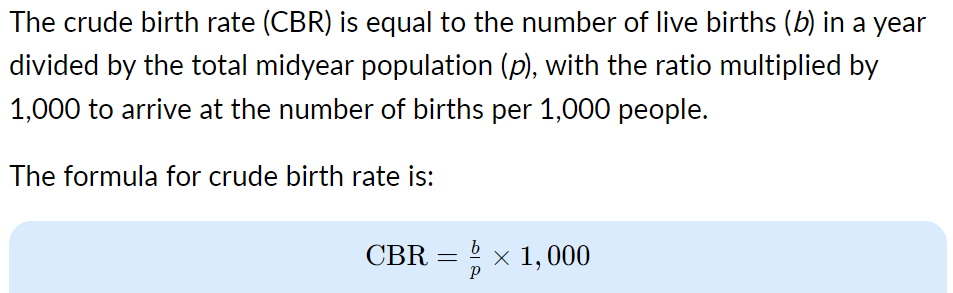

In [101]:
# Calculating crude birth rate 
#code copied from undefined, Contributor. "How to Calculate Crude Birth Rate" sciencing.com, https://sciencing.com/calculate-crude-birth-rate-4567314.html. 7 December 2021.

newborn =  len (df[df.Age ==0])
child4 =  len(df[df.Age ==4])

birth_rate = ((newborn)/len(df))*1000 

Child4years = ((child4)/len(df))*1000

print(f"Present CBR per 1000: {birth_rate}")
print(f"Previous CBR per 1000: {Child4years}")


print(f"Present CBR Change from Previous per 1000: {birth_rate-Child4years}")


Present CBR per 1000: 10.063399416322834
Previous CBR per 1000: 13.484955217872596
Present CBR Change from Previous per 1000: -3.4215558015497614


### DEPENDENCY RATIO 

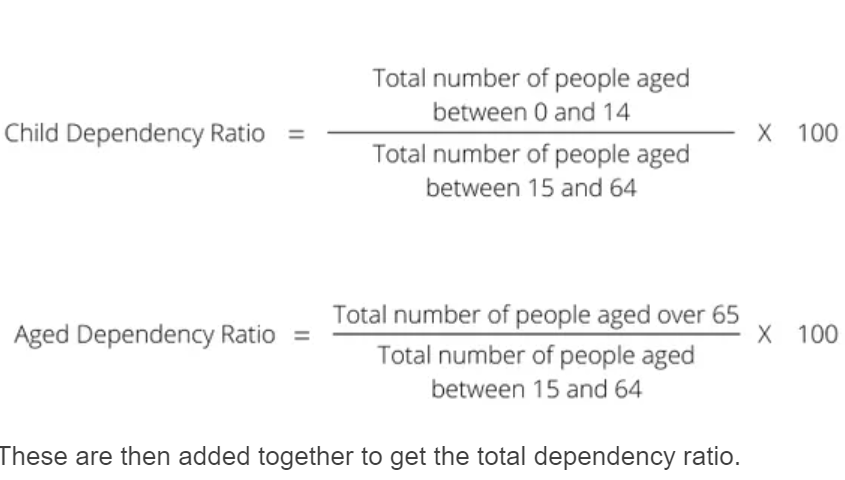

In [102]:
#formula copied from : https://boycewire.com/dependency-ratio-definition/

Age_0_14= len(df[(df['Age']==0) & (df.Age <= 14)])
Age_15_64 = len(df[(df['Age']>=15) & (df.Age <= 64)])
Age_65 = len(df[(df['Age']>=65)])


CDR = (Age_0_14/Age_15_64)*100
ADR =(Age_65/Age_15_64)*100

TDR= (CDR+ADR)

print(f"Child Dependency Ratio: {CDR}")
print(f"Adult Dependency Ratio: {ADR}")


print(f"Total Dependency Ratio: {TDR}")


Child Dependency Ratio: 1.4469686007813631
Adult Dependency Ratio: 16.886123571118507
Total Dependency Ratio: 18.33309217189987


### MIGRATION

###### Immigrants

In [103]:
census_immigrants = (len(df[(df['Relationship to Head of House']=='Visitor') | (df['Relationship to Head of House']=='Lodger') & (df['Marital Status']=='Single')])/len(df))*1000

print (f"Assumed immigrants per 1000: {census_immigrants}")

Assumed immigrants per 1000: 31.196538190600783


###### Commuters

In [104]:
census_commuters =(len(df[(df['Occupation']=='PhD Student') | (df['Occupation']=='University Student')])/len(df))*1000
print (f"Assumed commuters per 1000: {census_commuters}")

Assumed commuters per 1000: 69.94062594344369


In [105]:
#assuming 70% of employed work in the 2 much larger towns and also commute to work.
Total_commuters = (((len(Employed)*0.7)/len(df))*1000)+census_commuters
print (f"Assumed Total commuters per 1000: {Total_commuters}")

Assumed Total commuters per 1000: 432.7966186977961


###### Emmigrants

In [106]:
census_emmigrants= (len(df[(df['Relationship to Head of House']=='Lodger') & (df['Occupation']=='Unemployed') & (df['Marital Status']!='Divorced') ])/len(df))*1000
print (f"Assumed emmigrants per 1000: {census_emmigrants}")

Assumed emmigrants per 1000: 1.0063399416322834


In [107]:
divorced_30 =(len(df[(df['Marital Status']=='Divorced') & (df['Relationship to Head of House']=='Lodger')])/len(df))*1000
print (f"Divorced persons per 1000: {divorced_30}")

Divorced persons per 1000: 8.855791486364094


In [108]:
Total_census_emmigrants = census_emmigrants + divorced_30
print (f"Total assumed emmigrants per 1000: {Total_census_emmigrants}")

Total assumed emmigrants per 1000: 9.862131427996378


In [109]:
df[(df['Marital Status']=='Divorced') & (df['Relationship to Head of House']=='Lodger')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age band
26,10,May Road,Naomi,Evans,37,Lodger,Divorced,Female,Cabin crew,None,None,35-39
146,44,May Road,Laura,Pearce,56,Lodger,Divorced,Female,Radio producer,None,Christian,55-59
242,29,Price Road,Keith,Baker,54,Lodger,Divorced,Male,Editorial assistant,None,Methodist,50-54
535,28,Corporation Lane,Sophie,Hutchinson,58,Lodger,Divorced,Female,Unemployed,None,Christian,55-59
836,4,Hutchinson Spring,Ronald,Shaw,38,Lodger,Divorced,Male,"Surveyor, land/geomatics",None,Methodist,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...
9253,4,England Ways,Abbie,Connor,39,Lodger,Divorced,Female,"Engineer, mining",None,Christian,35-39
9389,32,Smith Fort,Natasha,Davies,50,Lodger,Divorced,Female,Maintenance engineer,None,Methodist,50-54
9680,42,Wells Pines,Kyle,Williams,62,Lodger,Divorced,Male,Chemical engineer,None,Christian,60-64
9752,16,Hunter Prairie,Hugh,Evans,56,Lodger,Divorced,Male,Museum/gallery exhibitions officer,None,None,55-59


In [110]:
#checking there are no married lodgers.
df[(df['Marital Status']=='Married') & (df['Relationship to Head of House']=='Lodger')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age band
